In [1]:
import networkx as nx
import pandas as pd

In [8]:
filename = 'data/outputs/tags-tags.csv'
df = pd.read_csv(filename)


In [16]:
weighted_edges = list(zip(df.v1, df.v2, df.weight))

In [40]:
G = nx.Graph()
G.add_weighted_edges_from(weighted_edges)
print(f'number of edges {len(G.edges)}')

number of edges 8776


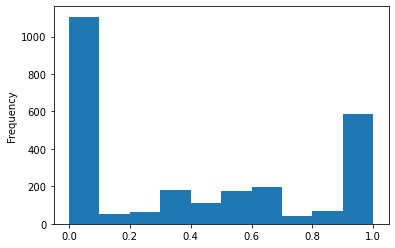

In [39]:
G_clustering = nx.clustering(G)
tags = pd.DataFrame(G_clustering.items(), columns=['tag', 'clustering_coeff'])
tags.clustering_coeff.plot.hist()

In [41]:
tags.head()

,tag,clustering_coeff
0,.hack-gu,0.000000
1,.hack-gu-last-recode,0.000000
2,0h-h1,0.000000
3,achievements,0.011494
4,1-bit-rogue,0.000000


# Connectivity 

In [45]:
nx.is_connected(G)

False

In [49]:
nx.connected_components(G)

<generator object connected_components at 0x000001E9ADAC7E40>

In [71]:
components_list = [[c, len(c)] for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [76]:
df_components = pd.DataFrame(components_list, columns=['tags', 'size'])

In [77]:
df_components.head()

,tags,size
0,"{ghostbusters-the-video-game, playstation-vr, ...",2473
1,"{kings-bounty-crossworlds, kings-bounty-the-le...",4
2,"{battletech, battletech-flashpoint, battletech...",3
3,"{call-of-duty-2, call-of-duty, call-of-duty-un...",3
4,"{god-eater-resurrection, god-eater-2, god-eate...",3


In [83]:
df_components.tags.apply(list).explode()

0         ghostbusters-the-video-game
0                      playstation-vr
0                           spy-mouse
0              golf-with-your-friends
0                        sega-genesis
                   ...               
51                         top-gear-2
52        yo-kai-watch-2-fleshy-souls
52    yo-kai-watch-2-psychic-specters
53                          ys-series
53             ys-8-lacrimosa-of-dana
Name: tags, Length: 2585, dtype: object

In [84]:
S = [G.subgraph(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [89]:
[len(s.nodes()) for s in S]

[2473,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]